Problem statement:
Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection. In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data,allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.


Importing the necessary libraries required 

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

Loading the car sales dataset

In [210]:
df = pd.read_csv("C:\\Users\\Dell\\Music\\learning\\internships\\COGSOFT\\task 2\\car_purchasing.csv",encoding="latin1")

In [211]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


Getting inforamtion about the dataframe

In [212]:
df.shape

(500, 9)

In [213]:
df.duplicated().sum()

0

In [214]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

Exploratory Data Analysis

In [215]:
len(df['country'].unique())

211

Since we are working on forcasting problem, the textual columns in the df such as name, email, country doesn't play an vital role in this . Its better if we drop those unnecessay columns

In [216]:
df.drop(columns=['customer name','customer e-mail','country'],inplace= True)

In [217]:
df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


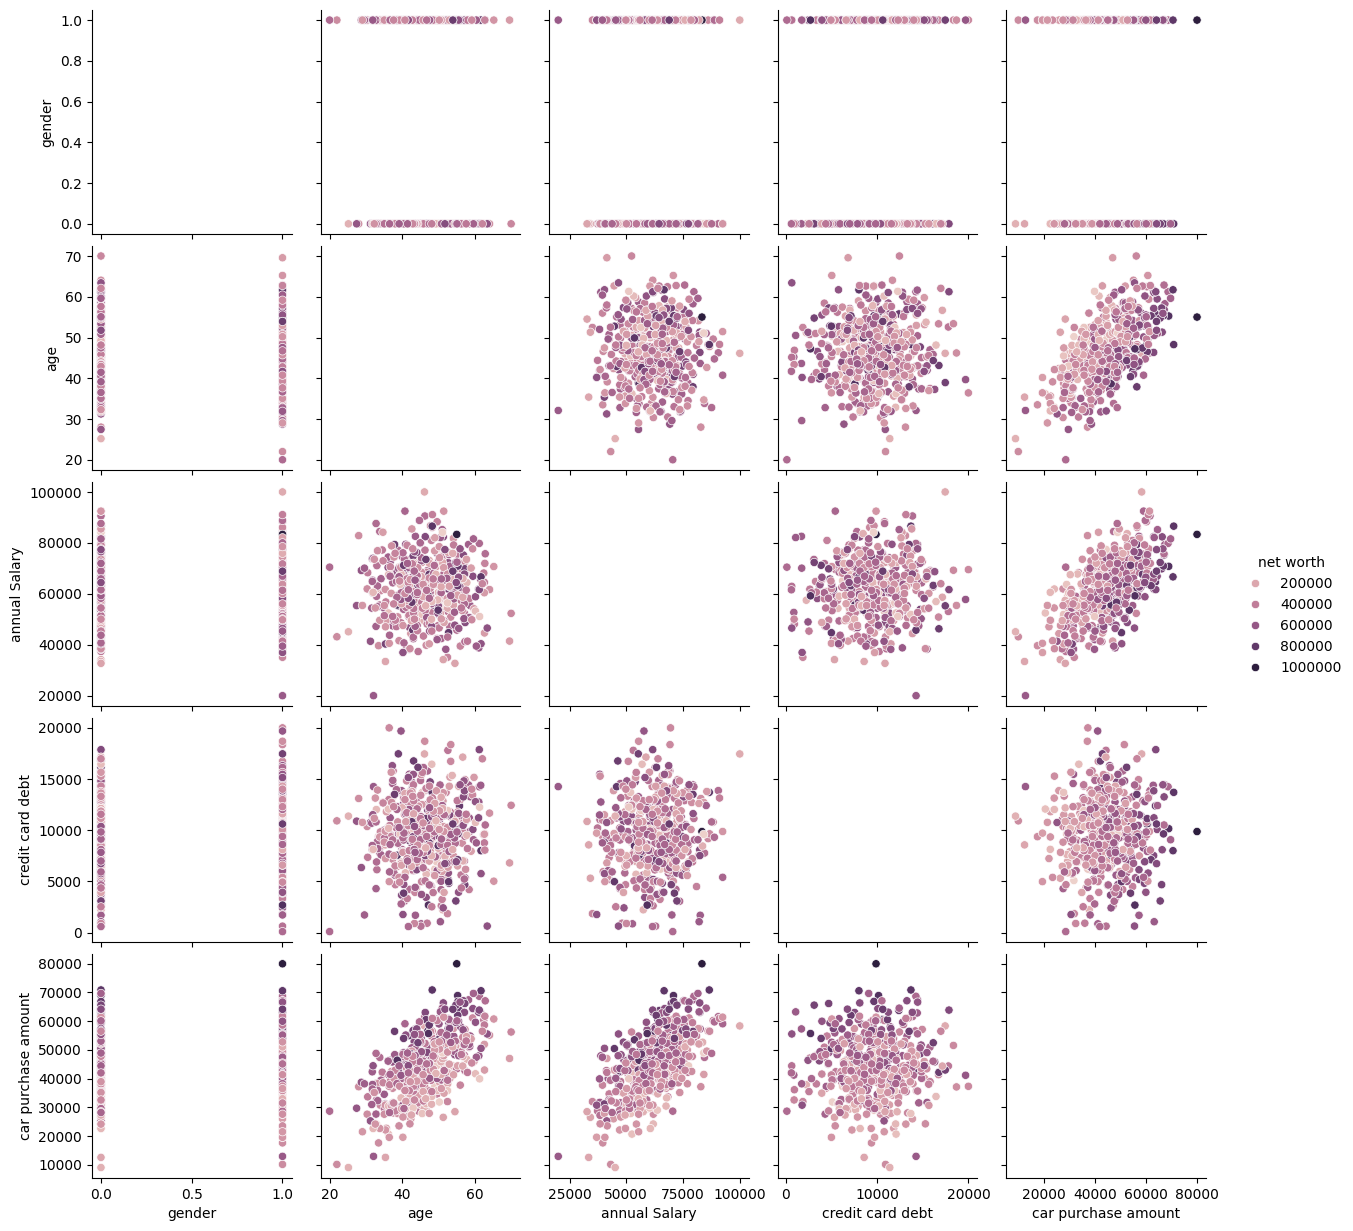

In [218]:
sns.pairplot(hue ='net worth', data = df)
plt.show()

Rounding off and Converting the age attribute into int-datatype

In [219]:
def round_off(object):
    return np.round(object)

In [220]:
df['age'] =  round_off(df['age']).astype('int')

In [221]:
df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248


Rounding off the other numerical values to 2 decimal points 

In [222]:
def amount_round(object):
    return np.round(object,2)

In [223]:
df['annual Salary'] = df['annual Salary'].apply(amount_round)
df['credit card debt'] = df['credit card debt'].apply(amount_round)
df['net worth'] = df['net worth'].apply(amount_round)
df['car purchase amount'] = df['car purchase amount'].apply(amount_round)

In [224]:
df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,42,62812.09,11609.38,238961.25,35321.46
1,0,41,66646.89,9572.96,530973.91,45115.53
2,1,43,53798.55,11160.36,638467.18,42925.71
3,1,58,79370.04,14426.16,548599.05,67422.36
4,1,57,59729.15,5358.71,560304.07,55915.46


Visualization 

visualization of the number of male and female in the given data where 1--> Mala and 0--> Female

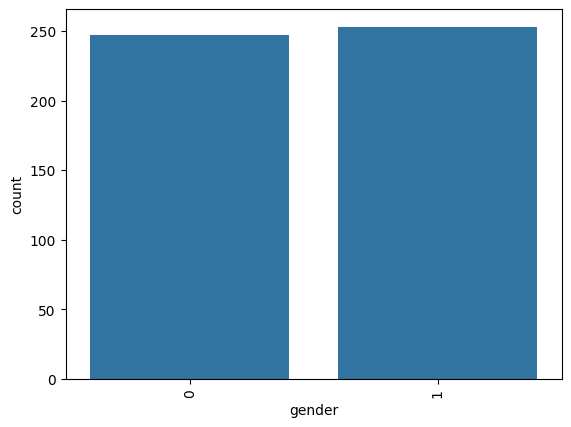

In [225]:
sns.countplot(x = 'gender', data = df)
plt.xticks(rotation = 90)
plt.show()


The visual representation of how the distribution of genders varies across different age groups in your dataset. Each bar at a specific age represents the count of each gender within that age group.

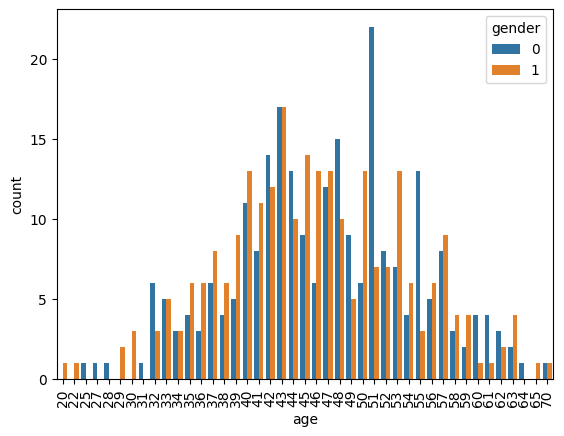

In [226]:
sns.countplot(x = 'age',hue = 'gender', data = df)
plt.xticks(rotation = 90)
plt.show()

The distribution of age follows the gaussian distribution and it is unimodal.

Business insights:
--> The plot showa that there is a large amount of people aged between 45 - 55. it also implies that there is high possibility that these        customers can afford huge sum of money for car purchase

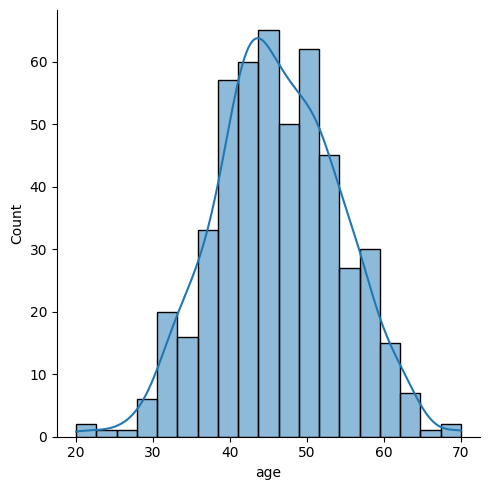

In [227]:
sns.displot(df['age'],kde = True)
plt.show()

The distribution of annual salary follows the gaussian distribution. It is unimodal and slightly negatively skewed.

Business insights:
--> The plot shows that there is a large amount of people with annual salary between 55k - 75k.
 it also implies that there is high possibility that these customers can afford huge sum of money for car purchase

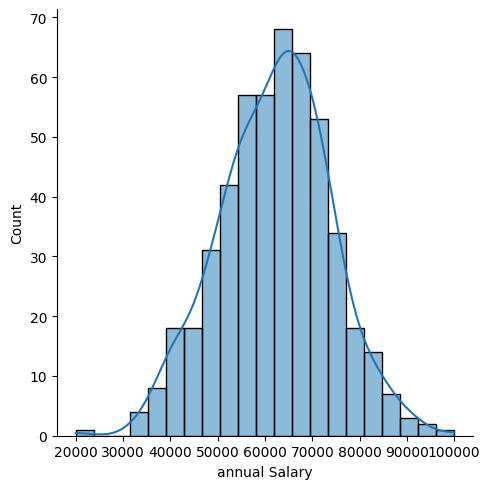

In [228]:
sns.displot(df['annual Salary'],kde= True)
plt.show()

The distribution of age follows the gaussian distribution and it is unimodal.

Business insights:
--> The plot showa that there is a large amount of people with debt anywhere between 9k-11k.
 it also implies that there is high possibility that these customers cannot afford huge sum of money for car purchase
 if their credit card debt is high

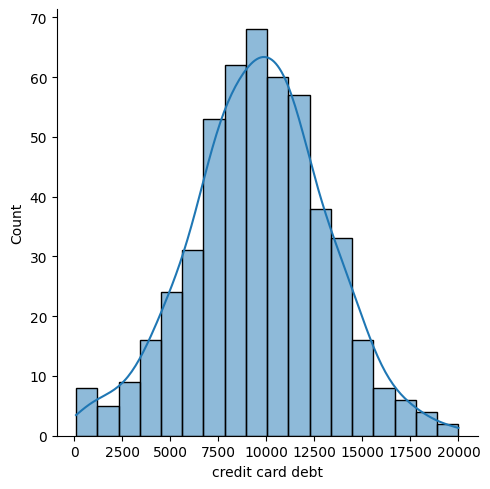

In [229]:
sns.displot(df['credit card debt'],kde = True)
plt.show()

Splitting the data for Trainning and Testing

In [230]:
x = df.drop(columns = ['car purchase amount'])
y = df['car purchase amount']

In [231]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Scaling the values of the columns before feeding into the Ml algorithm

In [232]:

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test = scaler.fit_transform(np.array(y_test).reshape(-1,1))

Forecasting using KNN neighbors 

In [233]:
values = []
values1 = []
for i in range(1,26):
    k_model = KNeighborsRegressor(n_neighbors=i)
    k_model.fit(x_train,y_train)
    prediction = k_model.predict(x_test)
    error = mean_absolute_error(y_test,prediction)
    values.append(error)
    error_1 = mean_squared_error(y_test,prediction)
    values1.append(error_1)

for j in range(len(values)):
    print(f"for the {j+1} neighbor the error is : {values[j]}")


      



for the 1 neighbor the error is : 0.17670818619535347
for the 2 neighbor the error is : 0.17100153724702602
for the 3 neighbor the error is : 0.1713665119827768
for the 4 neighbor the error is : 0.17189859271610003
for the 5 neighbor the error is : 0.1724732207393102
for the 6 neighbor the error is : 0.1702301004708551
for the 7 neighbor the error is : 0.17095176978675045
for the 8 neighbor the error is : 0.17044289800606646
for the 9 neighbor the error is : 0.17075476280241644
for the 10 neighbor the error is : 0.17056587369443524
for the 11 neighbor the error is : 0.16931731179942885
for the 12 neighbor the error is : 0.16805624875808814
for the 13 neighbor the error is : 0.16819146359692713
for the 14 neighbor the error is : 0.16913642614916358
for the 15 neighbor the error is : 0.17018282693387185
for the 16 neighbor the error is : 0.16954259804302674
for the 17 neighbor the error is : 0.16984829012787453
for the 18 neighbor the error is : 0.16902174780570875
for the 19 neighbor th

In [234]:
for k in range(len(values1)):
    print(f"for the {k+1} neighbor the error is : {values1[k]}")

for the 1 neighbor the error is : 0.03844226419289244
for the 2 neighbor the error is : 0.03654756655215253
for the 3 neighbor the error is : 0.03689278793450561
for the 4 neighbor the error is : 0.03683887313408543
for the 5 neighbor the error is : 0.037245820885338315
for the 6 neighbor the error is : 0.0368150095291564
for the 7 neighbor the error is : 0.037412300132107494
for the 8 neighbor the error is : 0.037700982704017616
for the 9 neighbor the error is : 0.0380417482015753
for the 10 neighbor the error is : 0.03809658528092675
for the 11 neighbor the error is : 0.037541279305295515
for the 12 neighbor the error is : 0.0372501433985515
for the 13 neighbor the error is : 0.037558749064447804
for the 14 neighbor the error is : 0.038103087827480356
for the 15 neighbor the error is : 0.03861306876838663
for the 16 neighbor the error is : 0.03846536331750667
for the 17 neighbor the error is : 0.03868964723360758
for the 18 neighbor the error is : 0.03844537108355361
for the 19 neigh

In [247]:
print(f"the neighbor with minimum error is : {min(values)}, {values.index(min(values))+1}")
print(f"The error rate in mean absolute error is {round(min(values)*100)}%")

the neighbor with minimum error is : 0.16805624875808814, 12
The error rate in mean absolute error is 17%


In [248]:
print(f"the neighbor with minimum error is : {min(values1)}, {values1.index(min(values1))+1}")
print(f"the error rate in mean squared error is {round(min(values1)*100)}%")

the neighbor with minimum error is : 0.03654756655215253, 2
the error rate in mean squared error is 4%


Forecasting using Randomforestregressor  - an Ensemble approach

In [237]:
model = RandomForestRegressor(n_estimators= 100, max_depth= 3,criterion= 'absolute_error')


In [238]:
model.fit(x_train,y_train)
prediction = model.predict(x_test)
error = mean_absolute_error(y_test,prediction)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [252]:
print(error)
print(f"the error rate in random forest model with mean absolute error metric is {round(error*100)}%")

0.177547128640892
the error rate in random forest model with mean absolute error metric is 18%


In [240]:

model1 = RandomForestRegressor(n_estimators= 100, max_depth= 5,criterion= 'squared_error')

In [241]:
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
er = mean_squared_error(y_test,pred)
print(er)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.0408072566373877


In [253]:
print(f"the error rate in random forest model with mean squared error metric is {round(er*100)}%")

the error rate in random forest model with mean squared error metric is 4%
